# Generalized Least Squares for Autocorrelation

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('SalesData.csv') #Switch to "SalesData.csv" for autocorrelation example
df.head()
df.dtypes

MonthYear              object
TotalSales              int64
AverageTemperature      int64
TotalPrecip             int64
LocalUE               float64
Recession               int64
Confidence            float64
TERMCBAUTO48NS        float64
UsedCPI               float64
SandP500              float64
DisposibleIncome      float64
GasPrice              float64
FederalFunds          float64
Covid                   int64
GAUsers                 int64
GAPageviews             int64
Leads                   int64
BOBBDC                  int64
NewInventory            int64
UsedInventory           int64
TotalInventory          int64
q2                      int64
q3                      int64
q4                      int64
dtype: object

In [18]:
xvars = ['AverageTemperature', 'TotalPrecip', 'LocalUE', 'GAUsers', 'Recession', 'TERMCBAUTO48NS', 'UsedCPI', 'BOBBDC', 'TotalInventory', 'q2', 'q3', 'q4']
X = df[xvars]
y = df['TotalSales']

In [20]:
OLS_model = sm.OLS(y, X) 
OLS_results = OLS_model.fit()
OLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             TotalSales   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              526.6
Date:                Wed, 22 May 2024   Prob (F-statistic):                    2.91e-98
Time:                        15:06:11   Log-Likelihood:                         -573.45
No. Observations:                 133   AIC:                                      1171.
Df Residuals:                     121   BIC:                                      1206.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.6739      0.222      3.042      0.003       0.235       1.112
TotalPrecip            0.0319      0.021      1.510      0.134      -0.010       0.074
LocalUE                1.3539      0.882      1.535      0.128      -0.393       3.101
GAUsers                0.0002      0.000      0.817      0.416      -0.000       0.001
Recession            -40.9431     14.558     -2.812      0.006     -69.764     -12.122
TERMCBAUTO48NS        13.6016      2.529      5.379      0.000       8.596      18.608
UsedCPI               -0.2136      0.076     -2.806      0.006      -0.364      -0.063
BOBBDC                39.0127      4.304      9.063      0.000      30.491      47.534
TotalInventory         0.2257      0.060      3.732      0.000       0.106       0.345
q2                   -10.3474      7.784     -1.329      0.186     -25.757       5.063
q3                   -17.1854      9.399     -1.828      0.070     -35.793       1.422
q4                   -11.1968      5.235     -2.139      0.034     -21.562      -0.832
==============================================================================
Omnibus:                        8.524   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                3.774
Skew:                           0.110   Prob(JB):                        0.151
Kurtosis:                       2.204   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Durbin-Watson Statistic 
dw_statistic = sm.stats.durbin_watson(OLS_results.resid)
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 1.497504677234037


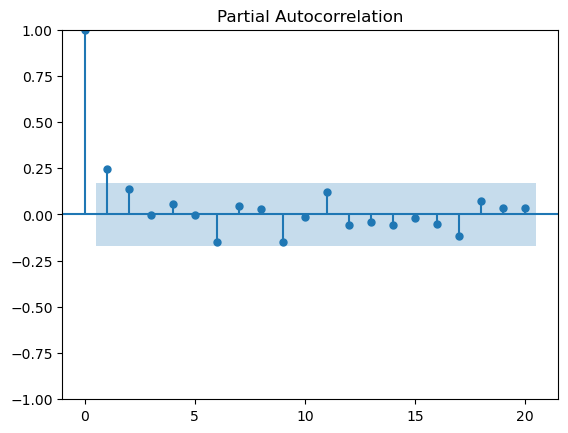

In [24]:
#PACF plot
sm.graphics.tsa.plot_pacf(OLS_results.resid, lags=20)
plt.show()

In [26]:
GLS_model = sm.GLSAR(y, X, rho=1)  #rho is the order of autoregression, per the PACF above
GLS_results = GLS_model.iterative_fit()
GLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                GLSAR Regression Results                               
=======================================================================================
Dep. Variable:             TotalSales   R-squared (uncentered):                   0.965
Model:                          GLSAR   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              275.3
Date:                Wed, 22 May 2024   Prob (F-statistic):                    3.35e-81
Time:                        15:06:21   Log-Likelihood:                         -564.26
No. Observations:                 132   AIC:                                      1153.
Df Residuals:                     120   BIC:                                      1187.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.8321      0.215      3.866      0.000       0.406       1.258
TotalPrecip            0.0186      0.020      0.940      0.349      -0.021       0.058
LocalUE                1.7374      1.096      1.585      0.116      -0.432       3.907
GAUsers             2.408e-05      0.000      0.080      0.937      -0.001       0.001
Recession            -44.7586     15.214     -2.942      0.004     -74.880     -14.637
TERMCBAUTO48NS        15.2012      3.159      4.811      0.000       8.946      21.457
UsedCPI               -0.2179      0.099     -2.205      0.029      -0.413      -0.022
BOBBDC                41.2584      5.261      7.842      0.000      30.842      51.675
TotalInventory         0.1551      0.059      2.614      0.010       0.038       0.273
q2                   -14.8605      7.211     -2.061      0.041     -29.137      -0.584
q3                   -22.9167      8.513     -2.692      0.008     -39.772      -6.061
q4                   -14.5002      5.510     -2.632      0.010     -25.410      -3.591
==============================================================================
Omnibus:                        4.178   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                2.812
Skew:                           0.183   Prob(JB):                        0.245
Kurtosis:                       2.385   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
OLS_params = OLS_results.params
GLS_params = GLS_results.params
param_frame = pd.DataFrame({"OLS": OLS_params, "GLS": GLS_params})
param_frame

,OLS,GLS
AverageTemperature,0.673852,0.832057
TotalPrecip,0.031911,0.018570
LocalUE,1.353929,1.737356
GAUsers,0.000207,0.000024
Recession,-40.943078,-44.758633
TERMCBAUTO48NS,13.601648,15.201157
UsedCPI,-0.213579,-0.217872
BOBBDC,39.012690,41.258422
TotalInventory,0.225663,0.155072
q2,-10.347363,-14.860463
